## Задача 2

Использовать метод Адамса 3-го порядка

$$𝑢_{𝑛+1} − 𝑢_{𝑛−1} = ℎ(\frac{23}{12} 𝑓_𝑛 − \frac{16}{12}𝑓_{𝑛−1} + \frac{5}{12}𝑓_{𝑛−2})$$

для решения системы ОДУ 0 ≤ 𝑡 ≤ 10:

$$\frac{𝑑𝑦1}{𝑑𝑡} = 𝑦1 − 𝑦1𝑦2$$
$$\frac{𝑑𝑦2}{𝑑𝑡} = −𝑦2 + 𝑦1𝑦2$$

с начальными условиями 𝑦1(0) = 2, 𝑦2(0) = 2

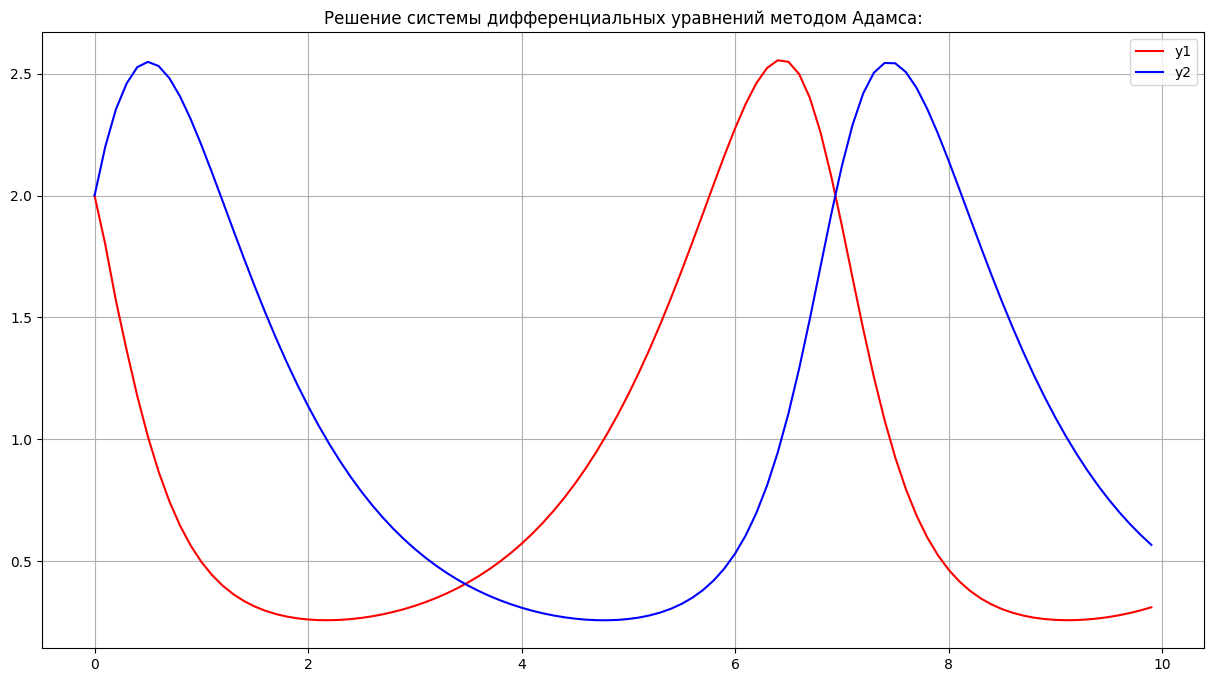

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp
from scipy. integrate import odeint

def getDerivative(U : list) -> list:
    y1 = U[1]
    y2 = U[2]
    Deriv = np.array([1, y1 - y1 * y2, -y2 + y1 * y2])
    return Deriv

def getStartCoord() -> list:
    return np.array([0, 2, 2])
    
        
def calculateAdamsTrajectory(StartCoord : list, Start: float, Stop: float, DeltaT: float) -> list:
    Trajectory = []
    K0 = StartCoord
    K1 = StartCoord
    K2 = StartCoord
    
    NumPoints = int((Stop - Start) / DeltaT)
    
    for Point in range(NumPoints):
        f2 = getDerivative(K2)
        f1 = getDerivative(K1)
        f0 = getDerivative(K0)
        K3 = K2 + DeltaT * (23.0/12 * f2 - 16.0/12 * f1 + 5.0/12 * f0)
        Trajectory.append(K2)
        K0 = K1
        K1 = K2
        K2 = K3
        
    return Trajectory

    
def main():
    plt.figure(figsize = (15, 8))
    plt.title("Решение системы дифференциальных уравнений методом Адамса:")

    Start = 0
    Stop = 10
    DeltaT = 0.1

    Args = np.arange(Start, Stop, DeltaT)
    AdamsVals = calculateAdamsTrajectory(getStartCoord(), Start, Stop, DeltaT)
    Y1 = []
    Y2 = []
    for Val in AdamsVals:
        Y1.append(Val[1])
        Y2.append(Val[2])
    plt.plot(Args, Y1, 'r', label = "у1")
    plt.plot(Args, Y2, 'b', label = "у2")
    
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()